In [2]:
import hssm
import arviz as az
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


/users/yzhao313/hssm_test/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Ground truth
param = pd.read_csv('../data/grp_param.csv')
param

,v_Intercept,v_x,v_y,a,z,t,batch
0,1.262140,0.794911,0.192499,1.794331,0.504190,0.620820,0
1,1.470230,0.717940,0.176244,1.369892,0.590004,0.435947,1
2,1.357233,0.841372,0.115218,1.544301,0.696709,0.515662,2
3,1.337985,0.703831,0.128578,1.507650,0.474337,0.487121,3
4,1.043969,0.814589,0.226565,1.851806,0.663501,0.497030,4
5,1.399860,0.867280,0.208480,1.968522,0.517163,0.477725,5
6,1.308933,0.808177,0.109054,1.737529,0.597250,0.467386,6
7,1.300166,0.707776,0.097577,1.601818,0.557558,0.547836,7
8,1.435601,0.829570,0.148182,1.782264,0.441001,0.423701,8
9,1.260019,0.789834,0.252692,1.547350,0.424286,0.445366,9


In [3]:
# Load
model = az.InferenceData.from_netcdf('/users/yzhao313/hssm_test/HSSM/outputs/grp_param_recover/Model_1')
model


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
summary = az.summary(model, var_names=["v_Intercept", "v_x", "v_y", "a_Intercept", "t_Intercept", "z_Intercept"])
summary

In [ ]:
az.rcParams["plot.max_subplots"] = 32
az.plot_trace(model)
plt.tight_layout()
plt.show()

In [7]:
fitted_a = []
fitted_z = []
fitted_t = []
fitted_v_intercept = []
fitted_vx = []
fitted_vy = []

for batch in range(30):
    model = az.InferenceData.from_netcdf(f'/users/yzhao313/hssm_test/HSSM/outputs/grp_param_recover/Model_{batch}')
    summary_mean = az.summary(model, var_names=["v_Intercept", "v_x", "v_y", "a_Intercept", "t_Intercept", "z_Intercept"])['mean']
    fitted_a.append(summary_mean['a_Intercept'])
    fitted_z.append(summary_mean['z_Intercept'])
    fitted_t.append(summary_mean['t_Intercept'])
    fitted_v_intercept.append(summary_mean['v_Intercept'])
    fitted_vx.append(summary_mean['v_x'])
    fitted_vy.append(summary_mean['v_y'])
    

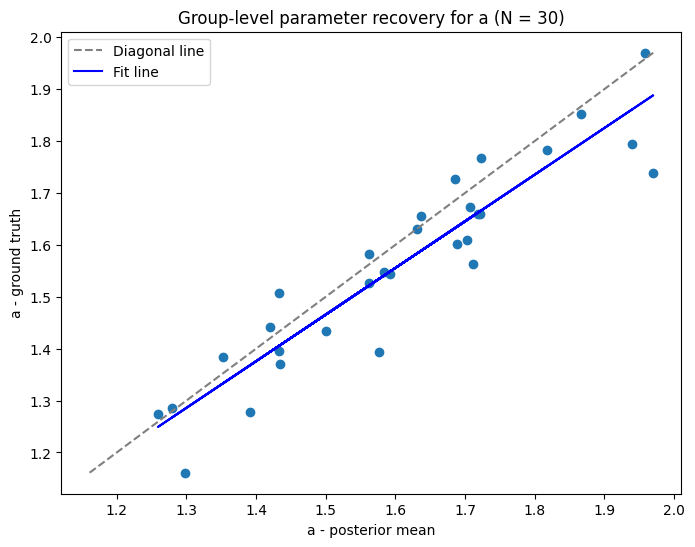

In [14]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_a, param['a'])

# Add a diagonal line
min_val = min(min(fitted_a), min(param['a']))
max_val = max(max(fitted_a), max(param['a']))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Diagonal line')

plt.xlabel('a - posterior mean')
plt.ylabel('a - ground truth')
plt.title('Group-level parameter recovery for a (N = 30)')

# Fit a regression line
model = LinearRegression()
fitted_np = np.array(fitted_a).reshape(-1, 1)
true_np = np.array(param['a'])
model.fit(fitted_np, true_np)
predicted = model.predict(fitted_np)

# Plot the regression line
plt.plot(fitted_a, predicted, label='Fit line', color='blue')
plt.legend()
plt.show()


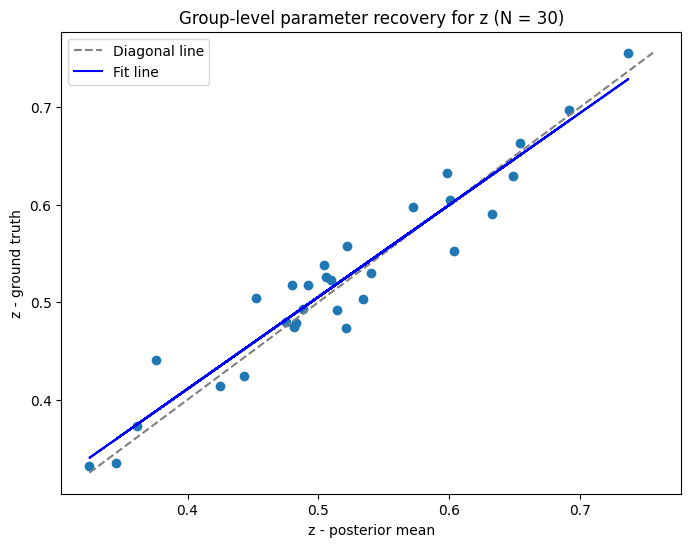

In [15]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_z, param['z'])

# Add a diagonal line
min_val = min(min(fitted_z), min(param['z']))
max_val = max(max(fitted_z), max(param['z']))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Diagonal line')

plt.xlabel('z - posterior mean')
plt.ylabel('z - ground truth')
plt.title('Group-level parameter recovery for z (N = 30)')

# Fit a regression line
model = LinearRegression()
fitted_np = np.array(fitted_z).reshape(-1, 1)
true_np = np.array(param['z'])
model.fit(fitted_np, true_np)
predicted = model.predict(fitted_np)

# Plot the regression line
plt.plot(fitted_z, predicted, label='Fit line', color='blue')
plt.legend()
plt.show()


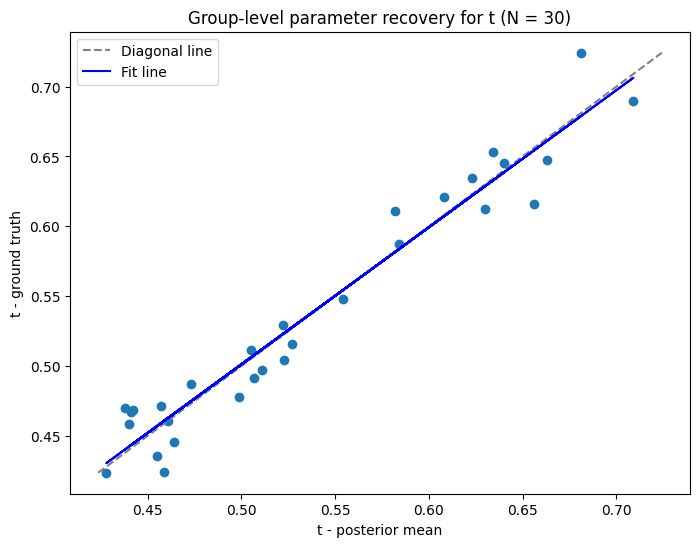

In [16]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_t, param['t'])

# Add a diagonal line
min_val = min(min(fitted_t), min(param['t']))
max_val = max(max(fitted_t), max(param['t']))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Diagonal line')

plt.xlabel('t - posterior mean')
plt.ylabel('t - ground truth')
plt.title('Group-level parameter recovery for t (N = 30)')

# Fit a regression line
model = LinearRegression()
fitted_np = np.array(fitted_t).reshape(-1, 1)
true_np = np.array(param['t'])
model.fit(fitted_np, true_np)
predicted = model.predict(fitted_np)

# Plot the regression line
plt.plot(fitted_t, predicted, label='Fit line', color='blue')
plt.legend()
plt.show()


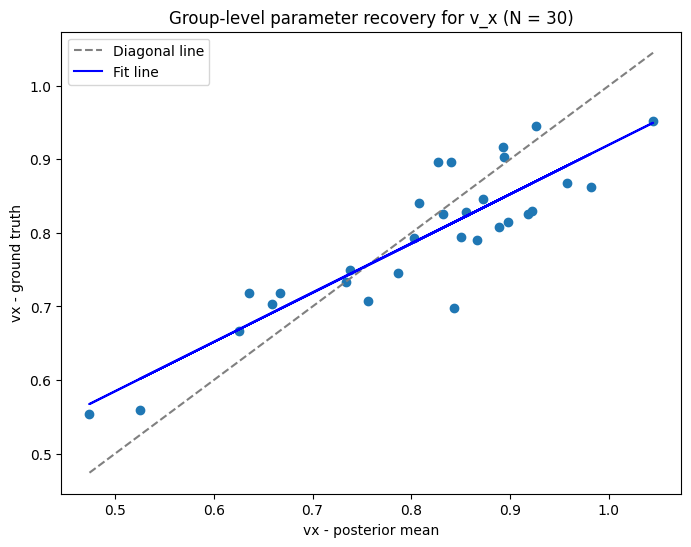

In [20]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vx, param['v_x'])

# Add a diagonal line
min_val = min(min(fitted_vx), min(param['v_x']))
max_val = max(max(fitted_vx), max(param['v_x']))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Diagonal line')

plt.xlabel('vx - posterior mean')
plt.ylabel('vx - ground truth')
plt.title('Group-level parameter recovery for v_x (N = 30)')

# Fit a regression line
model = LinearRegression()
fitted_np = np.array(fitted_vx).reshape(-1, 1)
true_np = np.array(param['v_x'])
model.fit(fitted_np, true_np)
predicted = model.predict(fitted_np)

# Plot the regression line
plt.plot(fitted_vx, predicted, label='Fit line', color='blue')
plt.legend()
plt.show()


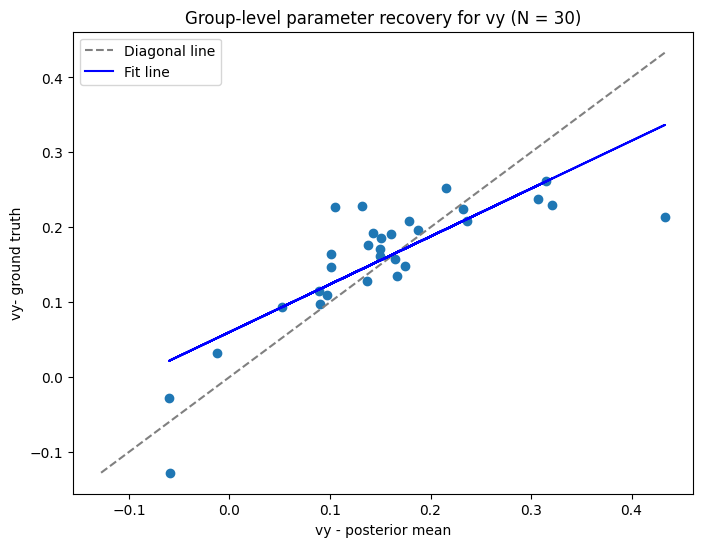

In [18]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vy, param['v_y'])

# Add a diagonal line
min_val = min(min(fitted_vy), min(param['v_y']))
max_val = max(max(fitted_vy), max(param['v_y']))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Diagonal line')

plt.xlabel('vy - posterior mean')
plt.ylabel('vy- ground truth')
plt.title('Group-level parameter recovery for vy (N = 30)')

# Fit a regression line
model = LinearRegression()
fitted_np = np.array(fitted_vy).reshape(-1, 1)
true_np = np.array(param['v_y'])
model.fit(fitted_np, true_np)
predicted = model.predict(fitted_np)

# Plot the regression line
plt.plot(fitted_vy, predicted, label='Fit line', color='blue')
plt.legend()
plt.show()


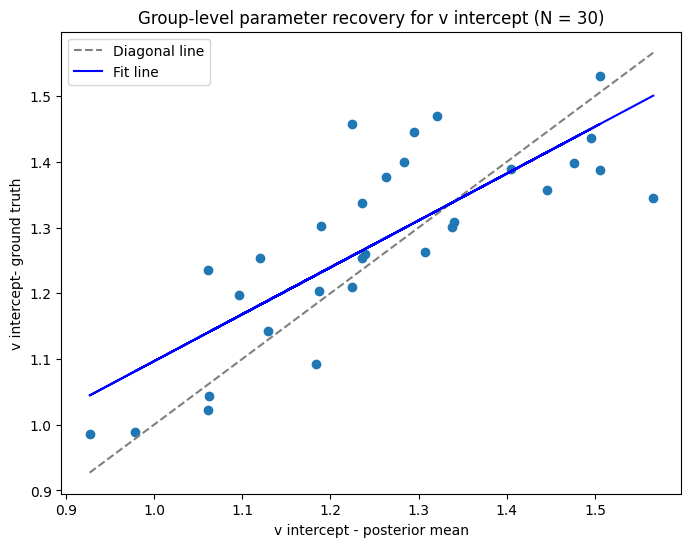

In [21]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_v_intercept, param['v_Intercept'])

# Add a diagonal line
min_val = min(min(fitted_v_intercept), min(param['v_Intercept']))
max_val = max(max(fitted_v_intercept), max(param['v_Intercept']))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Diagonal line')

plt.xlabel('v intercept - posterior mean')
plt.ylabel('v intercept- ground truth')
plt.title('Group-level parameter recovery for v intercept (N = 30)')

# Fit a regression line
model = LinearRegression()
fitted_np = np.array(fitted_v_intercept).reshape(-1, 1)
true_np = np.array(param['v_Intercept'])
model.fit(fitted_np, true_np)
predicted = model.predict(fitted_np)

# Plot the regression line
plt.plot(fitted_v_intercept, predicted, label='Fit line', color='blue')
plt.legend()
plt.show()
